# Relative_EEG_%Evolution

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("EEG - Sortie Variables.xlsx", "Relatives %Evo")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,25.0,0,0,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,3.05014,1.6497,0.000000,0,5.454692,1,3.103440,1,0,1,1,0,1,1,0,1,1,0,0,-0.024852,-3.489783,-3.387019,-3.015605,-3.549256,-1.782902,-3.190236,-1.359246,4.248189,14.512718,11.169320,8.777516,11.070550,11.057762,11.163808,13.460100,10.854732,14.278644,19.809455,6.735859,2.987261,1.700017,2.041516,2.353998,2.034689,4.149299,1.455097,4.831965,13.606429,-7.306703,-6.406935,-5.624519,-8.060662,-7.220497,-8.749130,-8.687554,-8.708565,-8.659904,-5.621008,-1.290169,-1.920567,-7.141095,-6.197144,-7.044651,-5.228718,-2.522656,-5.119375,-1.800562,3.416105,6.395829,4.366886,4.488796,-3.402771
1,01DJ,25.0,0,0,0,5,4,Abs. Marquage,2,Lecture,351,1,1,2,0,2.65012,NaN,0.000000,0,4.167806,1,0.264597,0,0,0,1,0,1,0,0,1,0,1,0,1.037501,1.634899,2.222953,2.594632,1.886845,0.236184,2.217869,-0.406472,-1.018893,15.052081,12.007384,14.085308,17.700760,16.861135,17.996386,17.451765,18.527859,17.155318,13.594028,8.172148,7.829059,9.738553,8.536823,9.522355,7.958607,7.602145,9.050731,7.143866,8.438165,-3.085416,-0.708427,-2.051998,-2.570428,-2.435553,-2.738355,-2.761320,-2.351133,-2.940461,-3.756575,-4.565419,-3.980602,-2.652226,-1.772600,-1.746498,-1.740915,-4.388077,-1.856242,-5.205225,-5.806378,6.477856,8.723820,7.563071,5.533143
2,01DJ,25.0,0,0,0,6,5,Météo,3,Conversation,224,0,0,0,0,8.00000,NaN,0.000000,0,2.861475,1,0.065688,0,0,0,1,0,1,0,0,1,0,1,0,-2.489131,-2.122508,-1.659473,-1.359401,-1.910160,-1.522628,-2.448632,-1.261833,3.404579,14.452833,9.200197,11.229939,13.819606,13.021746,14.146127,14.089524,12.722184,14.572511,17.658672,6.793879,4.891790,4.669907,3.729044,5.139624,2.943197,3.403726,2.028981,3.740644,12.643438,-5.965409,-5.233648,-3.493165,-5.018622,-3.063859,-5.911914,-7.875861,-7.535954,-8.016116,-4.907561,-1.031577,-6.418883,-7.313509,-5.084238,-5.937942,-4.477332,-2.085405,-4.950607,-1.237145,4.084620,6.945577,6.371586,5.732437,-0.230396
3,01DJ,25.0,0,0,0,1,1,Travaux_1,4,Jeu vidéo,128,0,0,1,1,2.00009,1.2935,0.000000,0,5.495789,1,3.184360,1,0,1,0,0,1,1,0,0,0,0,0,442.391470,447.690288,448.504400,451.626197,445.738696,447.927727,443.277388,449.300944,466.639396,533.831834,504.132834,516.741311,534.602693,530.941053,535.925351,535.409650,528.668507,537.783890,547.097035,493.317993,477.991395,492.726711,480.708718,487.631217,476.747613,482.243657,477.930107,483.366592,515.322298,420.165041,421.195287,421.584686,420.503956,427.

In [3]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,356.000000,357.000000,356.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,43.190476,0.733894,0.490196,0.476190,3.462185,2.658263,3.487395,411.921569,0.812325,0.336134,0.675070,0.616246,2.868189,16.953112,0.364146,9.131148,0.759104,2.103643,0.675070,0.075630,0.624650,0.789916,0.336134,0.717087,0.591036,0.288515,0.619048,0.487395,0.291317,0.0,1.044422,-0.209479,-1.878404,-1.456617,242.109390,-0.521251,-0.895725,-0.363041,4.714782,8.363001,8.147590,8.661215,7.762811,7.741043,7.833950,7.563762,8.913582,7.267463,9.826901,3.042930,3.907109,3.518854,0.630495,0.985447,0.516692,2.136165,2.245048,1.985303,5.431226,-3.482223,280.873650,-3.588391,-6.100931,-5.100801,-6.578980,-5.388188,-5.565284,-5.423497,-0.464826,-0.276375,-0.906435,-2.700797,-4.344102,-4.095376,-4.475478,-2.136062,-3.453494,-1.708276,4.390464,32.624655,6.572535,5.592434,8.183744
std,16.741806,0.827409,0.500605,0.500134,1.706514,1.489955,1.705241,322.424923,0.801028,0.473049,0.750109,0.486982,1.498398,29.055883,0.481865,10.551726,0.428228,1.391294,0.469006,0.264777,0.484893,0.407940,0.473049,0.451047,0.492333,0.453708,0.486302,0.500543,0.455007,0.0,24.346664,24.284325,24.395490,24.620293,4623.116476,24.069545,23.920186,24.258754,25.772676,31.507763,29.458612,30.366975,31.987585,31.638523,32.455454,31.876704,32.218468,32.040251,33.641240,27.605129,26.830570,28.164646,27.041597,27.579735,26.846433,27.236133,27.171226,27.238341,30.628174,24.209733,5336.083192,24.351050,24.152304,24.621591,23.936849,24.096810,24.095990,24.305788,25.854980,28.148650,25.010703,26.741796,26.749010,26.771926,26.811540,27.97

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Sujet                                                       357 non-null    object 
 1   Age                                                         357 non-null    float64
 2   Age category                                                357 non-null    int64  
 3   Gender                                                      357 non-null    int64  
 4   Scenario                                                    357 non-null    int64  
 5   ID scenario Event                                           357 non-null    int64  
 6   ID Event                                                    357 

None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                             0
Age                                                               0
Age category                                                      0
Gender                                                            0
Scenario                                                          0
ID scenario Event                                                 0
ID Event                                                          0
Event                                                             0
ID NDRT                                                           0
NDRT                                                              0
NDRT duration (s)                                                 0
NDRT duration                                                     0
NDRT solicitation hands                                           0
NDRT solicitation gaze                                            0
Lane changing                                   

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [4]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [5]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [6]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [7]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,0.028571,0.0,0,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.282625,1.6497,0.000000,0.0,0.035965,1.0,0.626606,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.060428,0.042195,0.030594,0.034239,0.000286,0.056628,0.032730,0.077670,0.091750,0.073661,0.075038,0.059184,0.065266,0.074963,0.064415,0.076467,0.076577,0.076328,0.084882,0.055004,0.047358,0.152595,0.049959,0.057330,0.045752,0.059632,0.058478,0.059653,0.103741,0.041108,0.000177,0.049900,0.042869,0.055137,0.045445,0.040687,0.160931,0.041393,0.052029,0.281053,0.163417,0.237098,0.255003,0.246657,0.261360,0.281794,0.269115,0.285559,0.318250,0.003965,0.067157,0.072396,0.095836
1,01DJ,0.028571,0.0,0,0.0,0.8,4,Abs. Marquage,2,Lecture,351,0.5,1,2,0,0.224651,NaN,0.000000,0.0,0.027208,1.0,0.046067,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.062684,0.053074,0.042628,0.046157,0.000348,0.060864,0.044446,0.079620,0.081404,0.074623,0.076610,0.069015,0.077104,0.085289,0.076596,0.083529,0.090261,0.081404,0.074095,0.057793,0.057068,0.166468,0.062851,0.071255,0.057660,0.066424,0.073487,0.064196,0.094509,0.050577,0.000233,0.057845,0.055131,0.065548,0.058973,0.054112,0.173697,0.054289,0.056101,0.275770,0.159370,0.244875,0.262553,0.255754,0.267282,0.278765,0.274597,0.280089,0.304542,0.003974,0.075578,0.078415,0.113345
2,01DJ,0.028571,0.0,0,0.0,1.0,5,Météo,3,Conversation,224,0.0,0,0,0,1.000000,NaN,0.000000,0.0,0.018318,1.0,0.005390,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.055194,0.045098,0.034300,0.037757,0.000305,0.057174,0.034336,0.077870,0.090093,0.073554,0.071343,0.063726,0.070174,0.078458,0.069732,0.077580,0.079908,0.076846,0.081149,0.055117,0.051177,0.157721,0.053309,0.062741,0.047578,0.058166,0.059612,0.057509,0.102021,0.044116,0.000188,0.054640,0.049663,0.064181,0.051831,0.042525,0.163286,0.042845,0.053587,0.281470,0.154579,0.236799,0.256902,0.248557,0.262636,0.282504,0.269399,0.286464,0.319243,0.004025,0.071032,0.074831,0.102052
3,01DJ,0.028571,0.0,0,0.0,0.0,1,Travaux_1,4,Jeu vidéo,128,0.0,0,1,1,0.130443,1.2935,0.000000,0.0,0.036245,1.0,0.643154,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.005428,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.004417,1.000000,1.000000,1.000000,1.000

### Dataset creation

>**We will start by separating the features from the targets**

In [8]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [9]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [10]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.549,0.617,0.707,0.672,0.839,0.644,0.732,0.553,0.386,0.91,0.629,0.781,0.939,0.966,0.925,0.827,0.902,0.805,0.701,0.48,0.387,0.324,0.719,0.68,0.735,0.52,0.59,0.498,0.385,0.79,0.415,0.579,0.762,0.677,0.87,0.857,0.85,0.884,0.927,0.093,0.266,0.161,0.16,0.157,0.165,0.108,0.162,0.094,0.053,0.525,0.583,0.624,0.474,0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.549,0.617,0.707,0.672,0.839,0.644,0.732,0.553,0.386,0.91,0.629,0.781,0.939,0.966,0.925,0.827,0.902,0.805,0.701,0.48,0.387,0.324,0.719,0.68,0.735,0.52,0.59,0.498,0.385,0.79,0.415,0.579,0.762,0.677,0.87,0.857,0.85,0.884,0.927,0.093,0.266,0.161,0.16,0.157,0.165,0.108,0.162,0.094,0.053,0.525,0.583,0.624,0.474
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.366,0.307,0.332,0.33,0.288,0.353,0.324,0.26,0.294,0.212,0.175,0.181,0.158,0.14,0.219,0.196,0.184,0.201,0.159,0.167,0.261,0.264,0.219,0.183,0.238,0.216,0.233,0.211,0.103,0.678,0.766,0.848,0.74,0.834,0.702,0.804,0.803,0.779,0.539,0.398,0.412,0.448,0.474,0.478,0.468,0.449,0.531,0.425,0.327,0.348,0.074,0.111,0.978,0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.366,0.307,0.332,0.33,0.288,0.353,0.324,0.26,0.294,0.212,0.175,0.181,0.158,0.14,0.219,0.196,0.184,0.201,0.159,0.167,0

In [11]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (220, 4)
TOQ (Coll a/o(TTC<1s & steering): (220, 4)
TOQ (Coll a/o(TTC<1s & mirror): (220, 3)


### TAKE-OVER WITH LANE CHANGING

In [12]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,Age,TOTAL BAND 1-50Hz,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872
0,0.028571,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.028571,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0.028571,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,0.028571,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,0.028571,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.922449,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
349,0.922449,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
351,0.922449,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
352,0.922449,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.549,0.617,0.707,0.672,0.839,0.644,0.732,0.553,0.386,0.91,0.629,0.781,0.939,0.966,0.925,0.827,0.902,0.805,0.701,0.48,0.387,0.324,0.719,0.68,0.735,0.52,0.59,0.498,0.385,0.79,0.415,0.579,0.762,0.677,0.87,0.857,0.85,0.884,0.927,0.093,0.266,0.161,0.16,0.157,0.165,0.108,0.162,0.094,0.053,0.525,0.583,0.624,0.474,0.029,0.174,0.063,0.03,0.023,0.393,0.269,NaN,0.549,0.617,0.707,0.672,0.839,0.644,0.732,0.553,0.386,0.91,0.629,0.781,0.939,0.966,0.925,0.827,0.902,0.805,0.701,0.48,0.387,0.324,0.719,0.68,0.735,0.52,0.59,0.498,0.385,0.79,0.415,0.579,0.762,0.677,0.87,0.857,0.85,0.884,0.927,0.093,0.266,0.161,0.16,0.157,0.165,0.108,0.162,0.094,0.053,0.525,0.583,0.624,0.474
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.366,0.307,0.332,0.33,0.288,0.353,0.324,0.26,0.294,0.212,0.175,0.181,0.158,0.14,0.219,0.196,0.184,0.201,0.159,0.167,0.261,0.264,0.219,0.183,0.238,0.216,0.233,0.211,0.103,0.678,0.766,0.848,0.74,0.834,0.702,0.804,0.803,0.779,0.539,0.398,0.412,0.448,0.474,0.478,0.468,0.449,0.531,0.425,0.327,0.348,0.074,0.111,0.978,0.009,0.782,0.036,0.604,0.001,0.884,0.824,NaN,0.366,0.307,0.332,0.33,0.288,0.353,0.324,0.26,0.294,0.212,0.175,0.181,0.158,0.14,0.219,0.196,0.184,0.201,0.159,0.167,0

In [14]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
NDRT duration (s),0.023
NDRT duration (s),0.023
Age,0.029
Age,0.029
ID NDRT,0.03
ID NDRT,0.03
Oz GAMMA 30-50Hz,0.053
Oz GAMMA 30-50Hz,0.053
ID Event,0.063
ID Event,0.063


,TOQ (Coll a/o(TTC<1s & steering)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.009
Age,0.009
ID Event,0.036
ID Event,0.036
FRONTAL THETA,0.074
FRONTAL THETA,0.074
Cz GAMMA 30-50Hz,0.103
Cz GAMMA 30-50Hz,0.103


,TOQ (Coll a/o(TTC<1s & mirror)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.005
Age,0.005
ID Event,0.073
ID Event,0.073
Gender,0.124
Gender,0.124
GAMMA 30-50Hz,0.189
GAMMA 30-50Hz,0.189


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,27,7
1.0,6,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81        34
         1.0       0.36      0.40      0.38        10

    accuracy                           0.70        44
   macro avg       0.59      0.60      0.59        44
weighted avg       0.71      0.70      0.71        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,29,5
1.0,8,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82        34
         1.0       0.29      0.20      0.24        10

    accuracy                           0.70        44
   macro avg       0.53      0.53      0.53        44
weighted avg       0.67      0.70      0.68        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,27,7
1.0,8,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        34
         1.0       0.22      0.20      0.21        10

    accuracy                           0.66        44
   macro avg       0.50      0.50      0.50        44
weighted avg       0.65      0.66      0.65        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,32,2
1.0,10,0


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        34
         1.0       0.00      0.00      0.00        10

    accuracy                           0.73        44
   macro avg       0.38      0.47      0.42        44
weighted avg       0.59      0.73      0.65        44

************************************



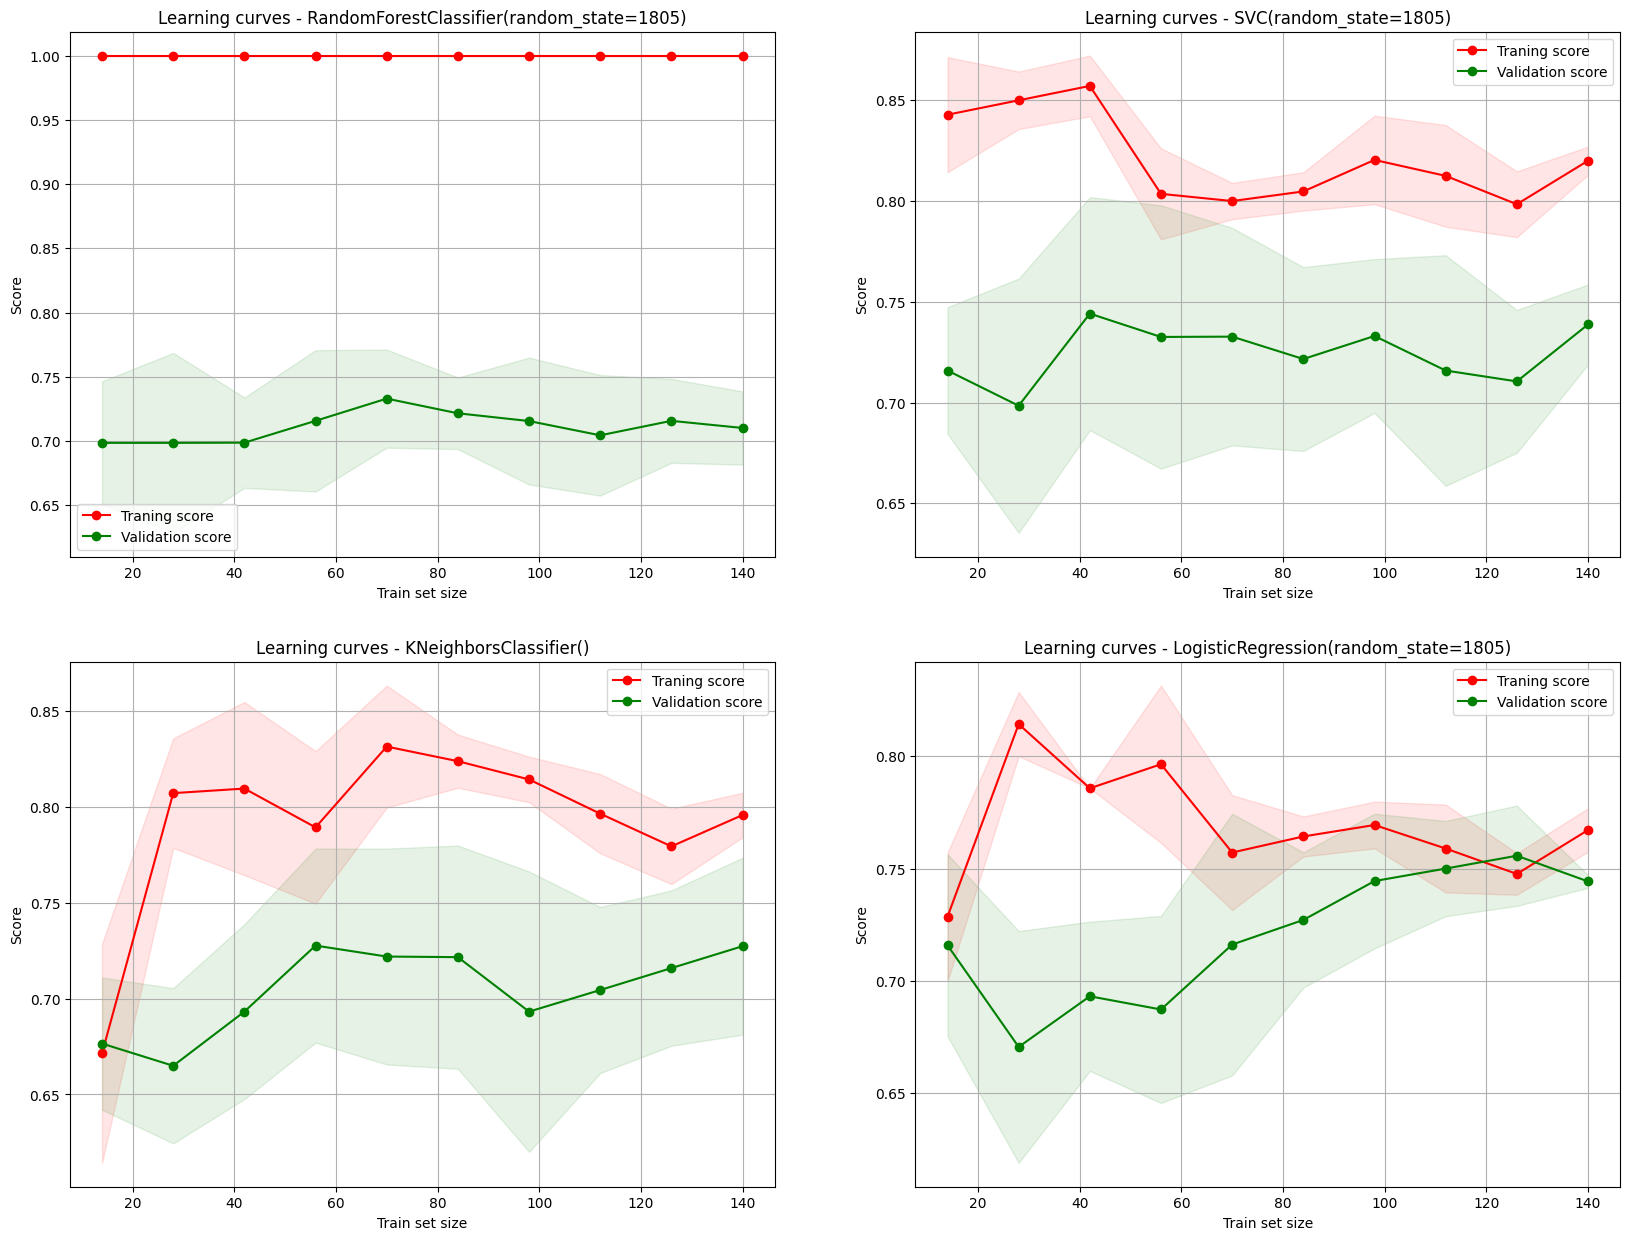

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",0.97,0.70,0.38,-0.09,Overfitting :0.28,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.84,0.70,0.24,-0.18,Overfitting :0.17,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.85,0.66,0.21,-0.24,Overfitting :0.22,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.76,0.73,0.00,-0.27,Overfitting :0.04,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,16,7
1.0,11,10


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64        23
         1.0       0.59      0.48      0.53        21

    accuracy                           0.59        44
   macro avg       0.59      0.59      0.58        44
weighted avg       0.59      0.59      0.59        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,15,8
1.0,8,13


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65        23
         1.0       0.62      0.62      0.62        21

    accuracy                           0.64        44
   macro avg       0.64      0.64      0.64        44
weighted avg       0.64      0.64      0.64        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,17,6
1.0,10,11


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68        23
         1.0       0.65      0.52      0.58        21

    accuracy                           0.64        44
   macro avg       0.64      0.63      0.63        44
weighted avg       0.64      0.64      0.63        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,15,8
1.0,5,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70        23
         1.0       0.67      0.76      0.71        21

    accuracy                           0.70        44
   macro avg       0.71      0.71      0.70        44
weighted avg       0.71      0.70      0.70        44

************************************



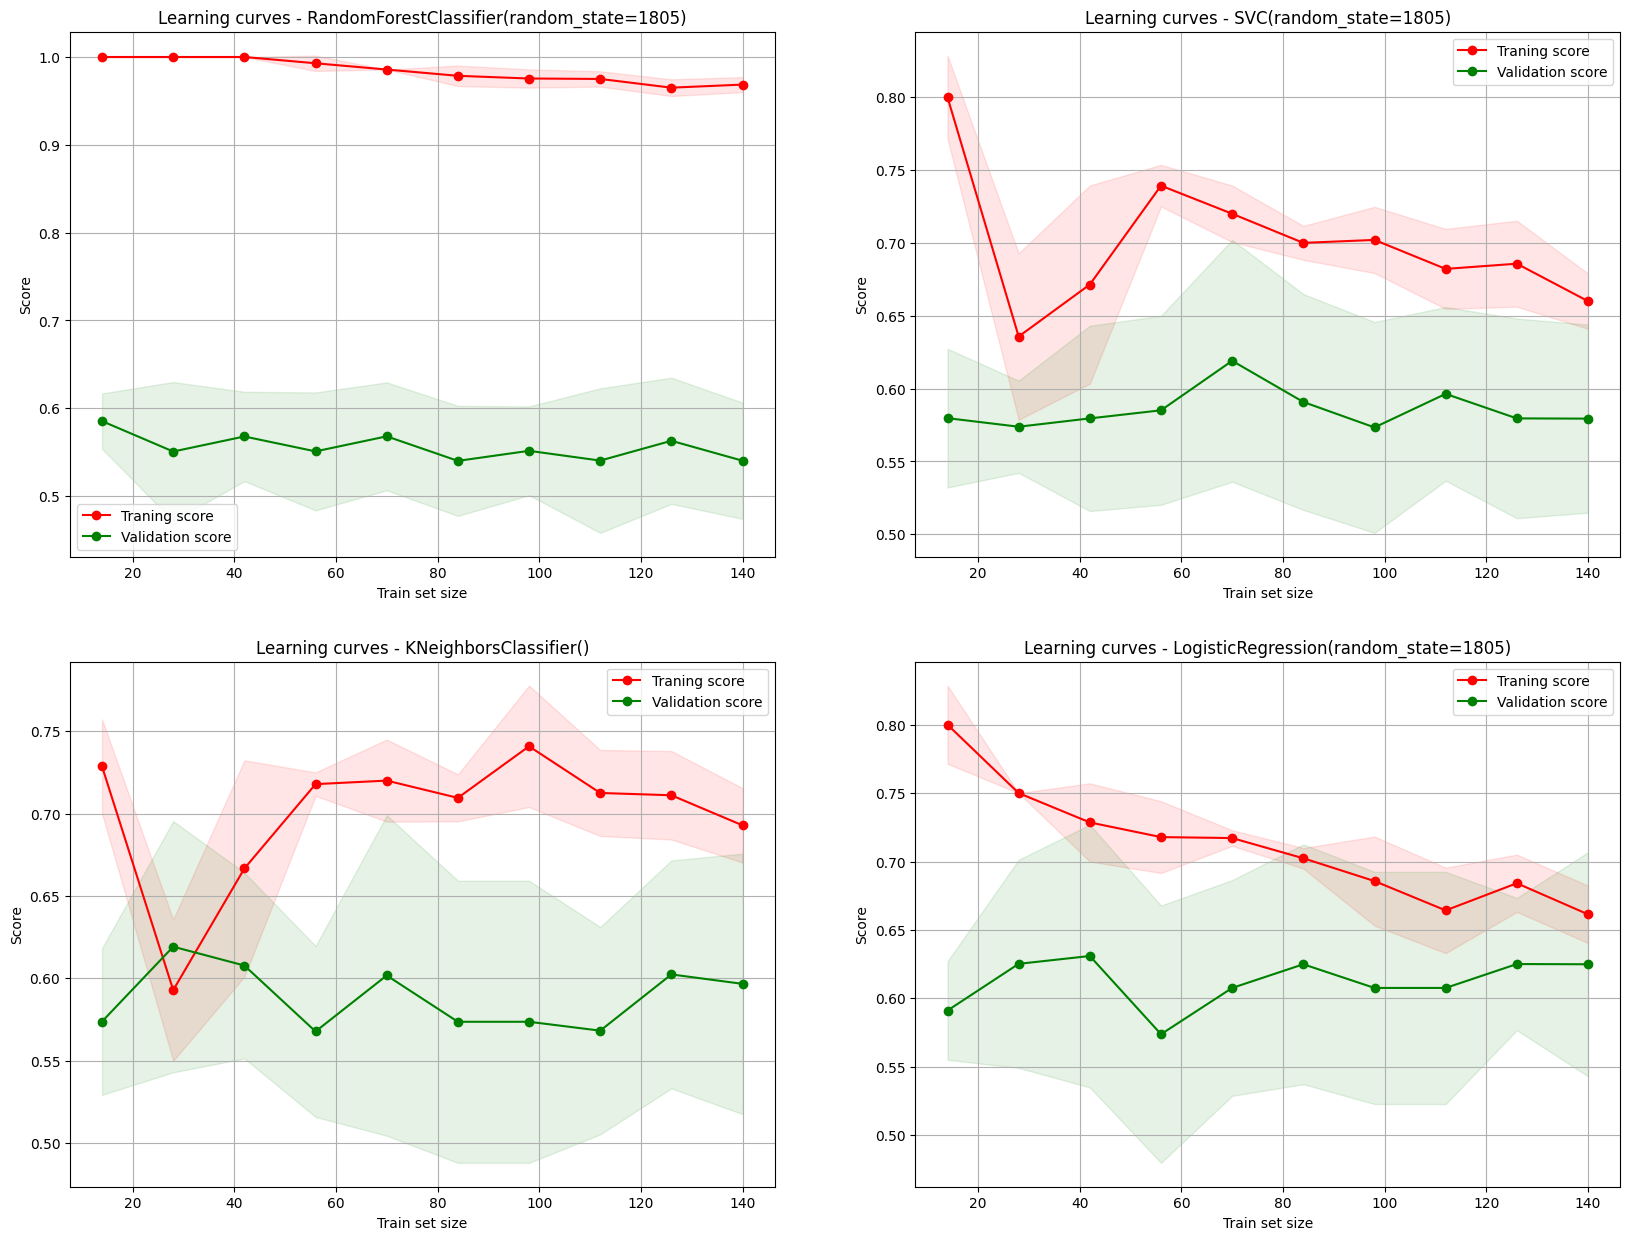

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.76,0.59,0.53,-0.17,Overfitting :0.22,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 1, 'gamma': 10, 'kernel': 'poly'}",0.67,0.64,0.62,-0.07,Overfitting :0.04,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.65,0.64,0.58,-0.08,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.66,0.70,0.71,0.09,Underfitting :-0.06,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,3,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.48      0.60        25
         1.0       0.55      0.84      0.67        19

    accuracy                           0.64        44
   macro avg       0.68      0.66      0.63        44
weighted avg       0.69      0.64      0.63        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,17
1.0,1,18


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.32      0.47        25
         1.0       0.51      0.95      0.67        19

    accuracy                           0.59        44
   macro avg       0.70      0.63      0.57        44
weighted avg       0.73      0.59      0.56        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,4,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.48      0.59        25
         1.0       0.54      0.79      0.64        19

    accuracy                           0.61        44
   macro avg       0.64      0.63      0.61        44
weighted avg       0.66      0.61      0.61        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,16
1.0,2,17


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50        25
         1.0       0.52      0.89      0.65        19

    accuracy                           0.59        44
   macro avg       0.67      0.63      0.58        44
weighted avg       0.69      0.59      0.57        44

************************************



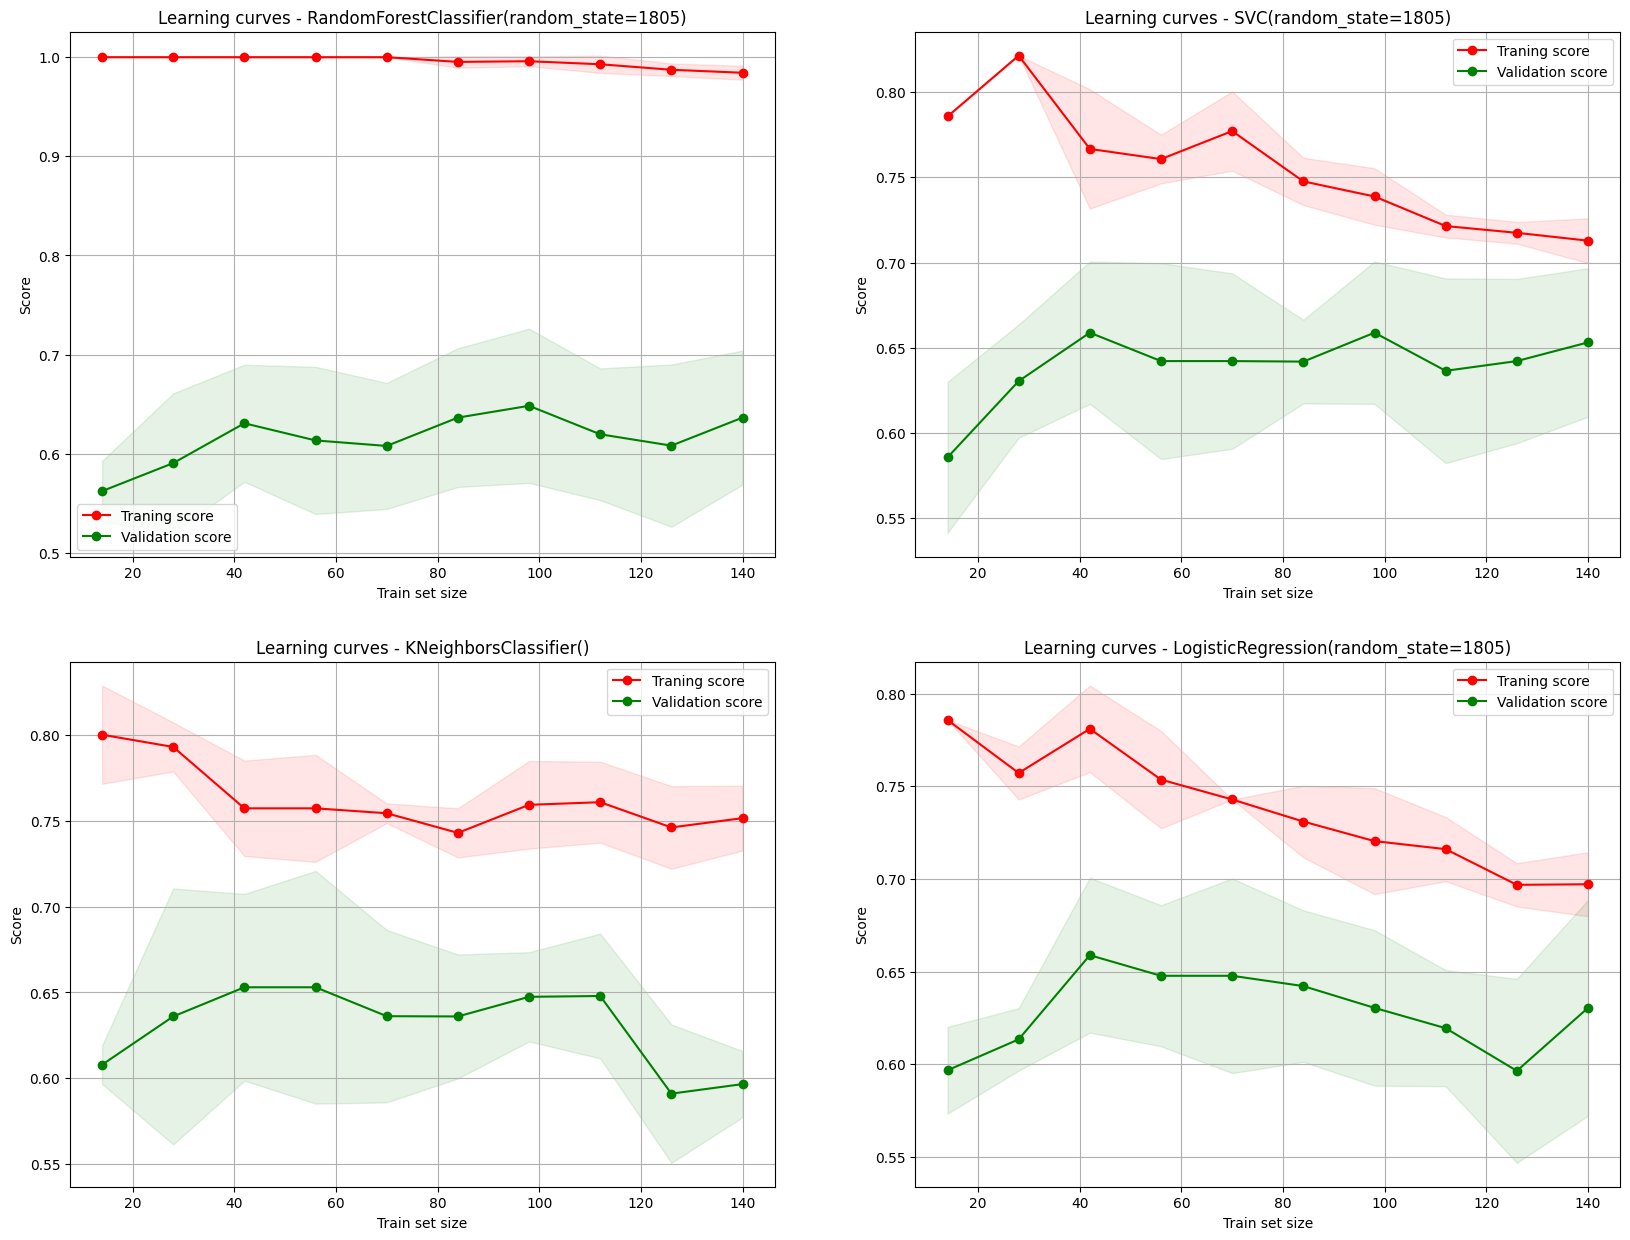

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.81,0.64,0.67,-0.07,Overfitting :0.21,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.67,0.59,0.67,-0.19,Overfitting :0.12,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.69,0.61,0.64,-0.12,Overfitting :0.12,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.68,0.59,0.65,-0.18,Overfitting :0.13,too much complex


In [15]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [16]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=500)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,73,13
1.0,13,101


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        86
         1.0       0.89      0.89      0.89       114

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,19
1.0,9,105


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83        86
         1.0       0.85      0.92      0.88       114

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,69,17
1.0,11,103


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        86
         1.0       0.86      0.90      0.88       114

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.86       200
weighted avg       0.86      0.86      0.86       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,66,20
1.0,21,93


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76        86
         1.0       0.82      0.82      0.82       114

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200

************************************



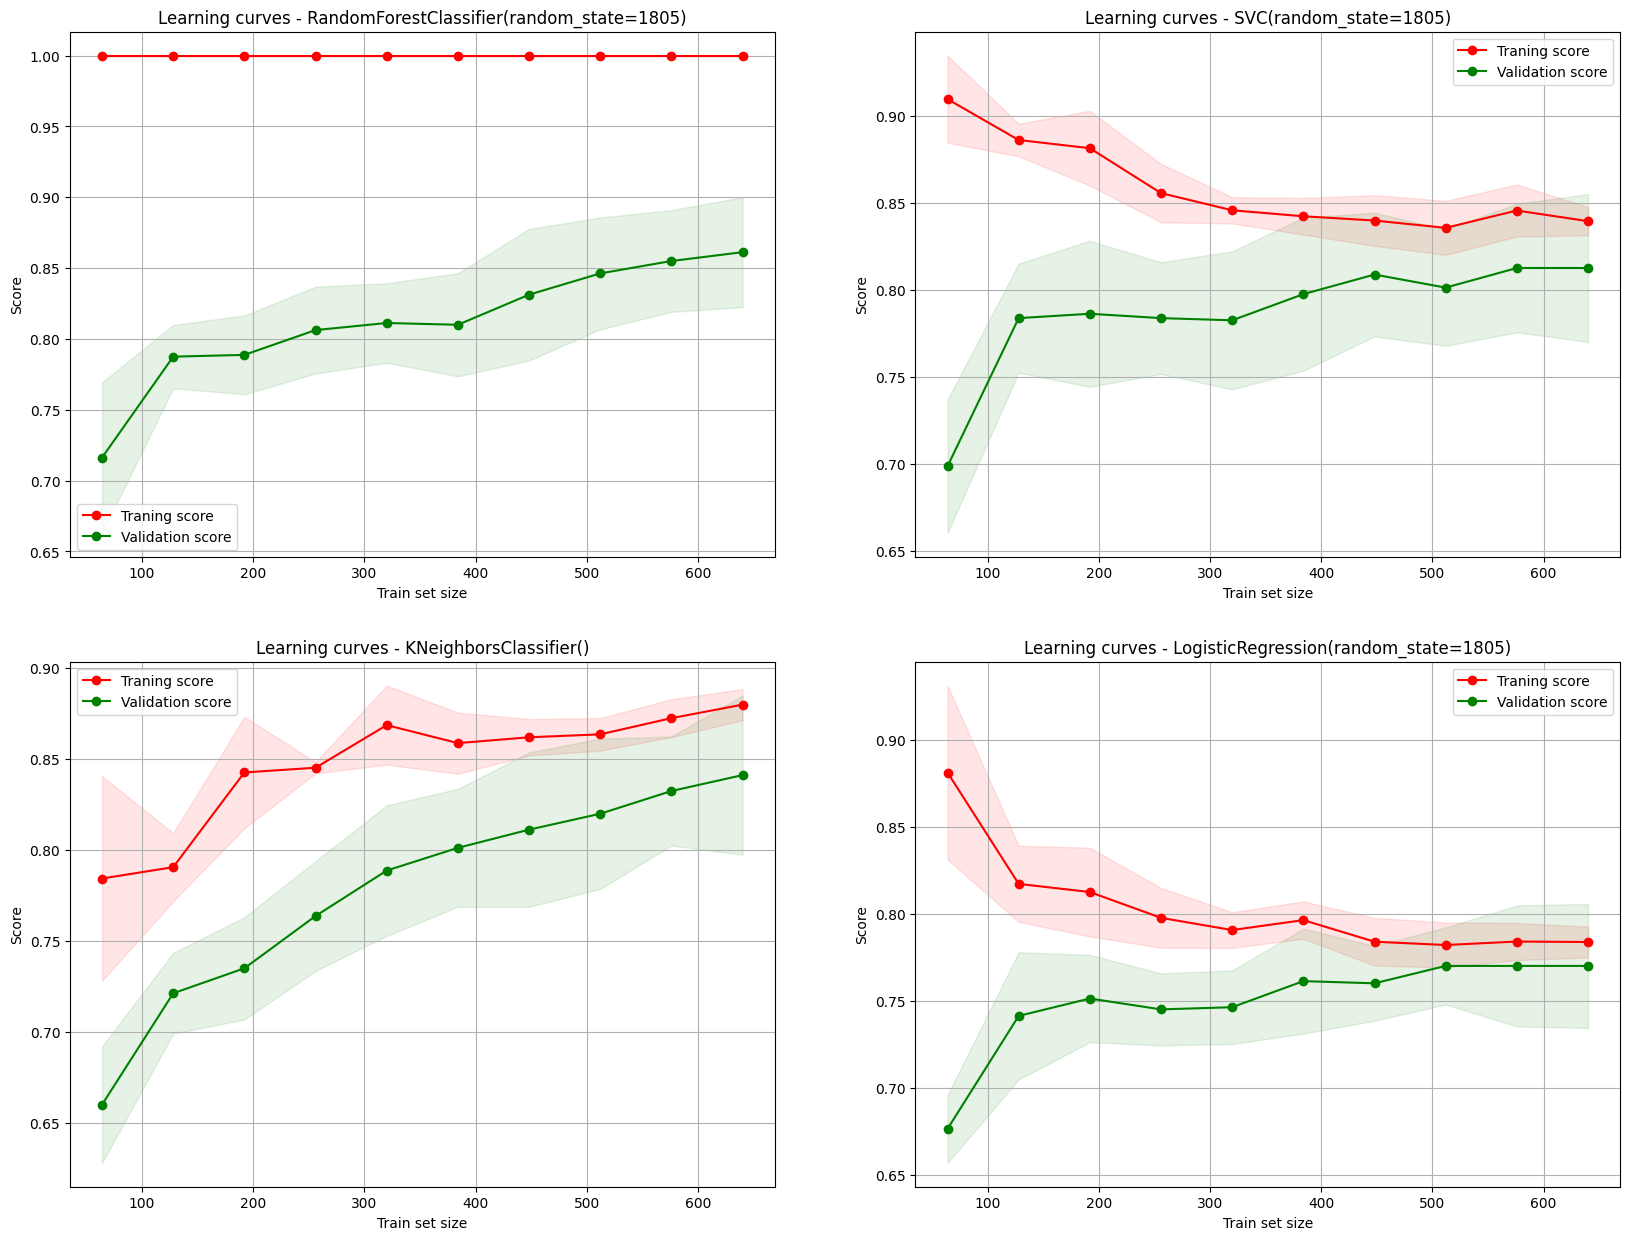

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",0.99,0.87,0.89,0.53,Overfitting :0.12,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.92,0.86,0.88,0.49,Overfitting :0.07,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'distan...",1.00,0.86,0.88,0.50,Overfitting :0.14,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.80,0.80,0.82,0.31,Overfitting :0.0,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,68,18
1.0,26,88


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76        86
         1.0       0.83      0.77      0.80       114

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,66,20
1.0,34,80


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71        86
         1.0       0.80      0.70      0.75       114

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,69,17
1.0,33,81


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73        86
         1.0       0.83      0.71      0.76       114

    accuracy                           0.75       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.75      0.75       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,64,22
1.0,34,80


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.74      0.70        86
         1.0       0.78      0.70      0.74       114

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200

************************************



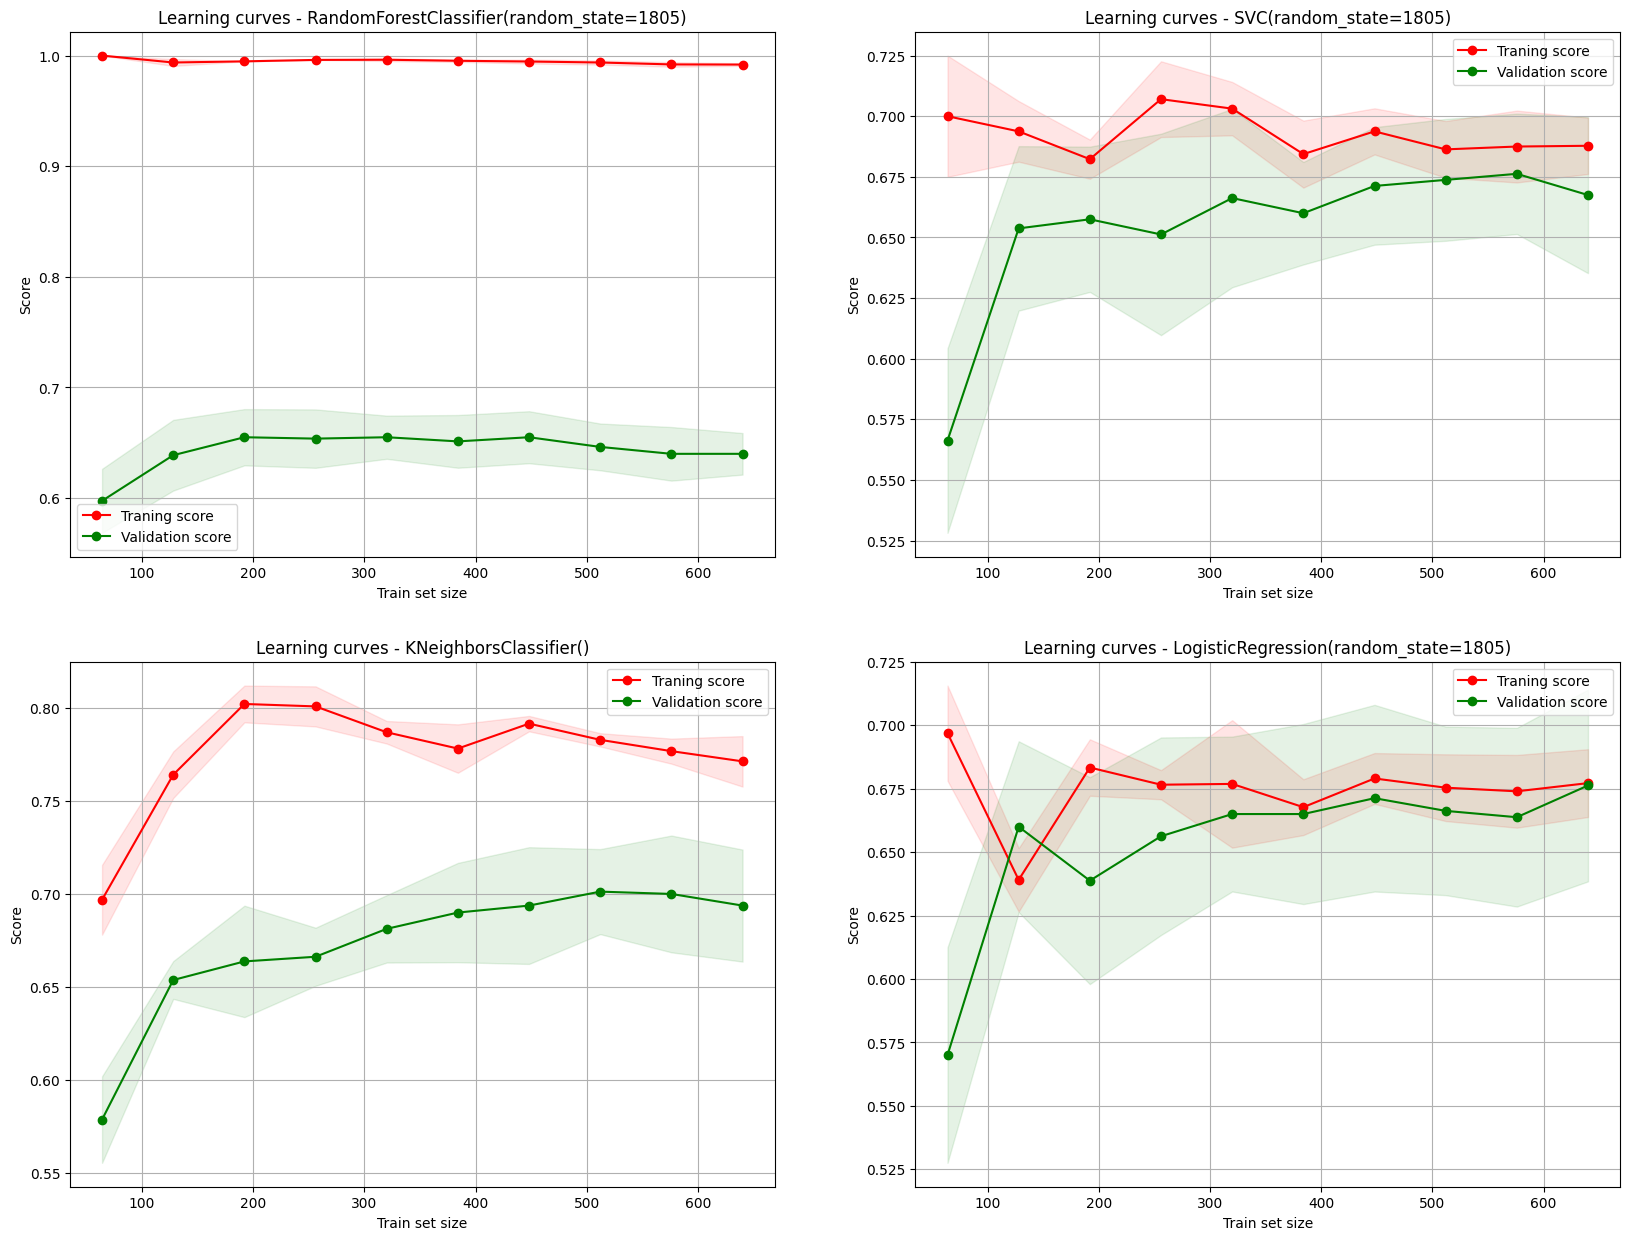

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.75,0.78,0.80,0.27,Underfitting :-0.04,not complexe enough
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.69,0.73,0.75,0.15,Underfitting :-0.06,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.77,0.75,0.76,0.20,Overfitting :0.03,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.68,0.72,0.74,0.12,Underfitting :-0.06,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,18
1.0,42,73


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69        85
         1.0       0.80      0.63      0.71       115

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.72      0.70      0.70       200

************************************



In [18]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [ ]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [ ]:
no_lane_pvalues

In [ ]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

In [ ]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

In [ ]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

In [ ]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [ ]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [ ]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [ ]:
X_no_lane_resampled

In [ ]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [ ]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [ ]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

In [ ]:
list(X_TOT_reduced.values())[0]

In [ ]:
TOT_pvalues

In [ ]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

In [ ]:
predict(X_TOT_encoded,y_TOT, method = 'regression')